In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tarih = pd.read_csv('Dim_Tarih.csv')

meteoroloji = pd.read_csv('MeteorolojiDegerleri.csv')

ozelgun = pd.read_csv('Dim_OzelGunTanimlari.csv')

imha = pd.read_csv('imha_2014-2016.txt', sep = '\t')

satis = pd.read_csv('satis_2014-2016.txt', sep = '\t')

stok = pd.read_csv('stok_2014-2016.txt', sep = '\t')

tarih['GunDateTime'] = pd.to_datetime(tarih['Gun'], format='%Y%m%d')

meteoroloji['GunDateTime'] = pd.to_datetime(meteoroloji['Gun'], format = '%Y%m%d')

In [10]:
meteoroloji.head()

,Gun,SehirID,MinimumSicaklik,OrtalamaSicaklik,MaksimumSicaklik,YagisMiktari,KarKalinligi,Yagmur,Kar,GunDateTime
0,20180213,133,-4.0,0.11,8.39,0.0,0.0,0,1,2018-02-13
1,20160827,133,11.0,19.33,33.00,0.0,0.0,0,0,2016-08-27
2,20161214,113,-8.0,-3.65,-0.83,0.0,0.0,0,0,2016-12-14
3,20170702,133,12.0,22.83,35.11,0.0,0.0,0,0,2017-07-02
4,20181115,133,-7.0,-3.11,5.22,0.0,0.0,0,0,2018-11-15


In [11]:
ozelgun['GunDateTime'] = pd.to_datetime(ozelgun['BaslangicTarih'], format = '%Y%m%d')

In [12]:
tarih['GunAy'] = tarih['GunDateTime'].dt.day

In [13]:
tarih['AyBasi'] = tarih['GunDateTime'].dt.is_month_start

In [14]:
tarih['AyBasiBit'] = np.where(tarih['AyBasi'] == True,1,0) 

In [15]:
tarih['GunYil'] = tarih['GunDateTime'].dt.dayofyear

In [16]:
tarih['Ceyrek'] = tarih['GunDateTime'].dt.quarter

In [17]:
satis['GunDateTime'] = pd.to_datetime(satis['Tarih'], format='%d.%m.%Y')

imha['GunDateTime'] = pd.to_datetime(imha['Tarih'], format='%d.%m.%Y')

stok['GunDateTime'] = pd.to_datetime(stok['Tarih'], format= '%d.%m.%Y')

In [20]:
satis2015sonrasi = satis[satis['GunDateTime'] >= '2015-01-01']

In [21]:
imha2015sonrasi = imha[imha['GunDateTime'] >= '2015-01-01']

In [22]:
stok2015sonrasi = stok[stok['GunDateTime'] >= '2015-01-01']

In [23]:
tarih1517 = tarih[(tarih['GunDateTime'] >= '2015-01-01') & (tarih['GunDateTime'] < '2017-01-01')]

In [24]:
satis.head()

,Tarih,Magaza,KategoriNo,KategoriAnaGrupNo,KategoriGrupNo,KategoriSinifNo,KategoriAltSinifNo,MalNo,SatisMiktar,SatisNetTutar,GunDateTime
0,01.01.2014,1096,4,300,10,11,10,12284590,2.0,35.59,2014-01-01
1,01.01.2014,1096,4,300,10,11,10,12284790,2.0,47.46,2014-01-01
2,01.01.2014,1096,4,300,11,10,10,21289490,6.0,50.34,2014-01-01
3,01.01.2014,1096,4,300,11,11,10,20288890,2.0,8.46,2014-01-01
4,01.01.2014,1096,4,300,11,11,10,20288990,0.0,41.47,2014-01-01


In [25]:
tarih1517Indexed = tarih1517.set_index('GunDateTime')

In [26]:
satis2015sonrasiIndexed = satis2015sonrasi.set_index('GunDateTime')

In [27]:
train_data_tar_sat = tarih1517Indexed.join(satis2015sonrasiIndexed, on = 'GunDateTime', how = 'outer' )

In [28]:
train_data_tar_sat_stok = train_data_tar_sat.join(stok2015sonrasi.set_index(['GunDateTime', 'MalNo'])
                                                  ,lsuffix = '_tar_sat', rsuffix = '_stok', 
                                                  on = ['GunDateTime', 'MalNo'], how = 'outer' )

In [29]:
train_data_tar_sat_stok_imha = train_data_tar_sat_stok.join(imha2015sonrasi.set_index(['GunDateTime', 'MalNo'])
                                                  ,lsuffix = '_tar_sat_stok', rsuffix = '_imha', 
                                                  on = ['GunDateTime', 'MalNo'], how = 'outer' )

train_data_tar_sat_stok_imha_met = train_data_tar_sat_stok_imha.join(meteoroloji.set_index('GunDateTime'), 
                                                                     lsuffix = '_tar_sat_stok_imha',
                                                                    rsuffix = '_met', how = 'left'
                                                                    ,on = 'GunDateTime')

In [30]:
train_data_tar_sat_stok_imha_met = train_data_tar_sat_stok_imha

In [31]:
train_data_tar_sat_stok_imha_met_ogun = train_data_tar_sat_stok_imha_met.join(ozelgun.set_index('GunDateTime'),
                                                                             lsuffix = '_tar_sat_stok_imha_met',
                                                                             rsuffix = '_ogun', how = 'left',
                                                                             on = 'GunDateTime')

In [40]:
train_data_1 = train_data_tar_sat_stok_imha_met_ogun.join(tarih1517Indexed, on = 'GunDateTime', how = 'left',
                                                         lsuffix = '_train_data', rsuffix = '_tarih')

In [42]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243237 entries, 2015-01-01 to 2017-01-01
Data columns (total 46 columns):
Gun_train_data               136050 non-null float64
Yil_tar_sat_stok_imha_met    136050 non-null float64
YilAy_train_data             136050 non-null float64
Ay_train_data                136050 non-null float64
YilHafta_train_data          136050 non-null float64
Hafta_train_data             136050 non-null float64
HaftaninGunu_train_data      136050 non-null float64
GununAdi_train_data          136050 non-null object
GunAy_train_data             136050 non-null float64
AyBasi_train_data            136050 non-null object
AyBasiBit_train_data         136050 non-null float64
GunYil_train_data            136050 non-null float64
Ceyrek_train_data            136050 non-null float64
Tarih_tar_sat                136050 non-null object
Magaza_tar_sat               136050 non-null float64
KategoriNo                   136050 non-null float64
KategoriAnaGrupNo           

In [43]:
train_data_1.to_csv('train_data_1.csv', sep = ';')

In [33]:
train_data = train_data_tar_sat_stok_imha_met_ogun.drop(['Yil_tar_sat_stok_imha_met',
                                                        'YilAy', 'YilHafta', 'GununAdi','AyBasi', 'Tarih_tar_sat',
                                                        'Magaza_tar_sat', 'Tarih_stok', 'Magaza_stok', 'Tarih',
                                                        'Magaza', 'Yil_ogun', 'BaslangicTarih',
                                                        'BitisTarih', 'KategoriNo'], axis = 1)

In [34]:
corr = train_data.corr()

In [35]:
corr

,Gun,Ay,Hafta,HaftaninGunu,GunAy,AyBasiBit,GunYil,Ceyrek,KategoriAnaGrupNo,KategoriGrupNo,KategoriSinifNo,KategoriAltSinifNo,MalNo,SatisMiktar,SatisNetTutar,StokMiktar,ImhaMiktar
Gun,1.000000,0.071620,0.070953,0.001145,0.005306,0.001121,0.081945,0.075236,0.040294,0.018132,0.001559,-0.006381,0.019305,0.030648,0.023110,0.032900,-0.070720
Ay,0.071620,1.000000,0.996642,-0.002281,-0.029259,-0.010013,0.920196,0.908762,0.020932,0.002741,0.018535,-0.000135,0.032883,0.002436,-0.026706,0.019792,-0.009586
Hafta,0.070953,0.996642,1.000000,-0.002611,0.022564,-0.019001,0.917372,0.904615,0.021238,0.002912,0.018313,-0.000205,0.032694,0.001885,-0.027148,0.019138,-0.008749
HaftaninGunu,0.001145,-0.002281,-0.002611,1.000000,0.002198,0.003505,-0.006584,-0.000303,0.017398,0.007814,-0.010795,-0.008348,0.001335,0.049961,0.053771,-0.002219,-0.025542
GunAy,0.005306,-0.029259,0.022564,0.002198,1.000000,-0.307771,0.096601,0.016849,0.005931,0.002524,-0.003391,-0.001655,0.000890,0.003784,0.008635,-0.011218,0.000866
AyBasiBit,0.001121,-0.010013,-0.019001,0.003505,-0.307771,1.000000,-0.028006,-0.002997,-0.003706,-0.000863,-0.000230,-0.001428,0.001538,-0.002153,-0.000889,0.002396,0.035662
GunYil,0.081945,0.920196,0.917372,-0.006584,0.096601,-0.028006,1.000000,0.969313,0.026196,0.006135,0.017211,-0.000493,0.031748,0.009420,-0.014654,0.021206,-0.010831
Ceyrek,0.075236,0.908762,0.904615,-0.000303,0.016849,-0.002997,0.969313,1.000000,0.025577,0.006511,0.020282,-0.000261,0.031990,0.007712,-0.017894,0.022509,0.000459
KategoriAnaGrupNo,0.040294,0.020932,0.021238,0.017398,0.005931,-0.003706,0.026196,0.025577,1.000000,0.408005,0.064160,0.006340,0.052720,-0.126542,-0.132543,-0.031583,0.049877
KategoriGrupNo,0.018132,0.002741,0.002912,0.007814,0.002524,-0.000863,0.006135,0.006511,0.408005,1.000000,-0.052290,0.172385,-0.154151,-0.083808,-0.034800,-0.139294,-0.191544


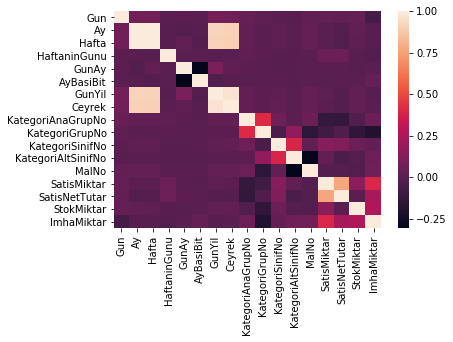

In [36]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [37]:
train_data.isna().sum()

Gun                   107187
Ay                    107187
Hafta                 107187
HaftaninGunu          107187
GunAy                 107187
AyBasiBit             107187
GunYil                107187
Ceyrek                107187
KategoriAnaGrupNo     107187
KategoriGrupNo        107187
KategoriSinifNo       107187
KategoriAltSinifNo    107187
MalNo                      0
SatisMiktar           107187
SatisNetTutar         107187
StokMiktar             36924
ImhaMiktar            228265
OzelGunTanim          231877
dtype: int64

In [38]:
train_data_astype = train_data.astype({"Ay":'int32', "Hafta":'int32', "HaftaninGunu":'int32', "GunAy":'int32',
                                       "AyBasiBit":'int32', "GunYil": 'int32', "Ceyrek":'int32',
                                       "KategoriAnaGrupNo":'object',"KategoriGrupNo":'object',
                                       "KategoriSinifNo":'object', "KategoriAltSinifNo":'object',"Yagmur":'int32',
                                      "Kar":'int32'})

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

In [ ]:
train_data.to_csv('train_data_1.csv', sep = ';')